<a href="https://colab.research.google.com/github/AliSalimkhani/DeepNN_Course2025/blob/main/DeepNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DeepNN  
**Ali Salimkhani**   
**401463141**  


In [ ]:
#defining matrices using numpy
import numpy as np
x = np.array([[1,2]])
w = np.array([[2],[3]])
b = np.array([1])

print(f"bias:\n {b}\n\n")
print(f"weight:\n {w}\n\n")
print(f"input:\n {x}\n\n")

bias:
 [1]


weight:
 [[2]
 [3]]


input:
 [[1 2]]




In [ ]:
#matrix multiplication using numpy
y = x @ w + b
target = 10
loss = np.mean((y-target)**2)

print(y)
print(loss)

[[9]]
1.0


In [ ]:
#defining matrices using torch
import torch
x = torch.tensor([[1.0,2.0]] , requires_grad=True)
w = torch.tensor([[2.0],[3.0]] , requires_grad=True)
b = torch.tensor([1])

print(f"bias:\n {b}\n\n")
print(f"weight:\n {w}\n\n")
print(f"input:\n {x}\n\n")

bias:
 tensor([1])


weight:
 tensor([[2.],
        [3.]], requires_grad=True)


input:
 tensor([[1., 2.]], requires_grad=True)




In [ ]:
#tensor multiplication and backpropagation
y = x @ w + b
y.backward()
print("dy/dw= ", w.grad)
print("dy/db= " , b.grad)
print(y)

dy/dw=  tensor([[1.],
        [2.]])
dy/db=  None
tensor([[9.]], grad_fn=<AddBackward0>)


<function matplotlib.pyplot.show(close=None, block=None)>

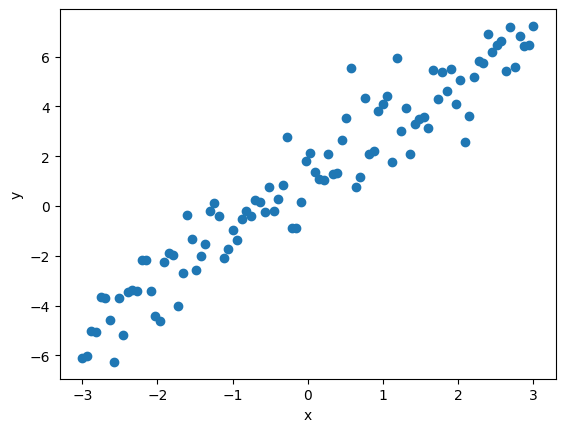

In [ ]:

#creating data
torch.manual_seed(0)
x = torch.linspace(-3,3,100).unsqueeze(1)

y = 2*(x) + 1 + torch.randn(x.size())


import matplotlib.pyplot as plt
# Convert to numpy for plotting
x_np = x.numpy()
y_np = y.numpy()


# Plot
plt.scatter(x_np, y_np)
plt.xlabel("x")
plt.ylabel("y")
plt.show

y =  1.9995545148849487 x +  1.0371382236480713


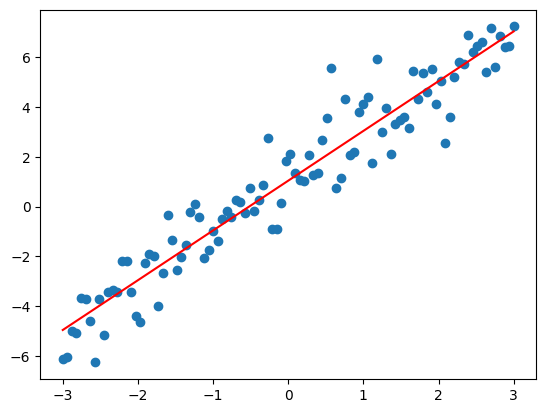

In [ ]:
#defining tensors & loss calculation & Bakcpropagation & Updating weights for (2x + 1)
w = torch.randn(1,1 , requires_grad=True)
b = torch.zeros(1,requires_grad=True)
losses = []
learning_rate = 0.01
for epoch in range(1000):
    y_predicted = x @ w + b
    loss = torch.mean((y_predicted - y)**2)
    losses.append(loss.item())
    loss.backward()
    with torch.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad
    w.grad.zero_()
    b.grad.zero_()

print("y = " , w.item(),"x + " , b.item())

# Convert to numpy for plotting
x_np = x.numpy()
y_np = y.numpy()

w_np = w.detach().numpy()
b_np = b.detach().numpy()

# Plot
import matplotlib.pyplot as plt

plt.scatter(x_np, y_np)
plt.plot(x_np, x_np * w_np + b_np ,color = "red")
plt.show()



In [ ]:
#doing the same thing but this time using torch
from torch import nn

model = nn.Linear(1,1)
opt = torch.optim.SGD(model.parameters(),lr=0.01)
loss_funcion = nn.MSELoss()
for epoch in range(1000):
    y_predicted2 = model(x)
    loss = loss_funcion(y_predicted2 , y)
    opt.zero_grad()
    loss.backward()
    opt.step()

print("Learned W and b" , [p.data for p in model.parameters()])

Learned W and b [tensor([[1.9996]]), tensor([1.0371])]


In [ ]:
# Session 1 & 2

# Session 1 & 2
---
# Exercise 1: Compute y= Wx + b with MSE loss.
- Define x, W and b
- write the formula
- Define target value
- Calculate loss and print
- x = [1 2], W = [2 ,3] , b = 1
                  



In [11]:
import numpy as np
import torch
import matplotlib.pyplot as plt

x = np.array([[1,2]])
print(x)

W = np.array([[2],[3]])
print(W)

b = np.array([1])
print(b)

y = x @ W + b
print(y)

target = 10
print(target)

loss = np.mean((y-target)**2)
print(loss)

[[1 2]]
[[2]
 [3]]
[1]
[[9]]
10
1.0


# Exercise 2: Linear Regression (Manual Gradient Descent)
- manual_seed()
- linspace(,,)
- unsqueeze()
- y = 2x + 1 + noise
- randn()
- size()
- plt.scatter()
- Initialize paramters
- Training Loop
- backward()
- Update parameters: .no_grad()
- .grad.zero_()
- .detach()
- plot, legend, show

Learned W: 1.9983339309692383
Learned b: 0.8995958566665649


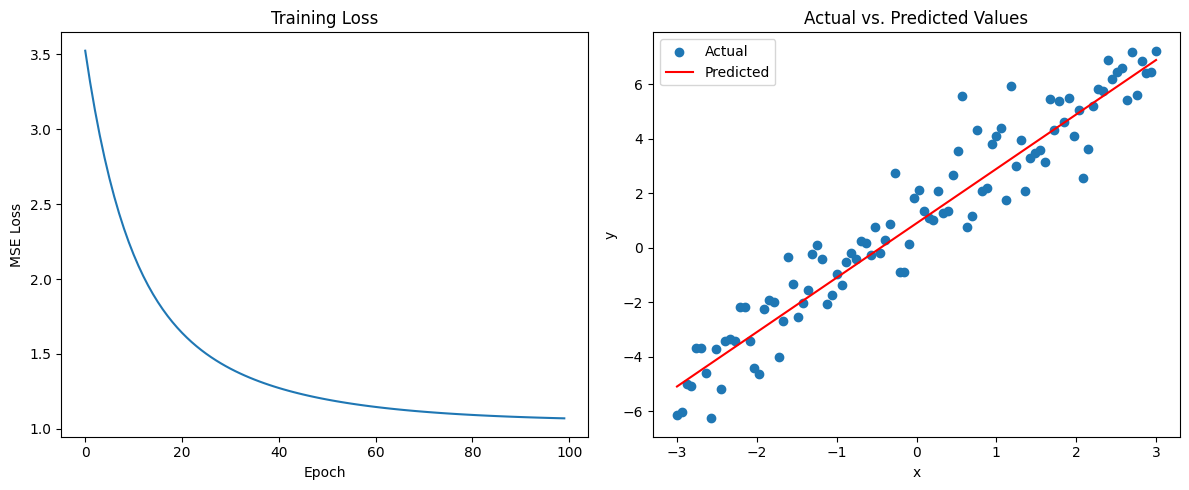

In [16]:
torch.manual_seed(0)
x = torch.linspace(-3,3,100).unsqueeze(1)
# print(x)
y = 2*x + 1 + torch.randn(x.size())
W = torch.randn(1,1, requires_grad=True)
b= torch.zeros(1,requires_grad=True)
losses = []
lr = 0.01
for epoch in range(100):
  y_predicted = x @ W + b
  loss = torch.mean((y_predicted - y)**2)
  losses.append(loss.item())
  loss.backward()
  with torch.no_grad():
    W -= lr*W.grad
    b -= lr*b.grad
  W.grad.zero_()
  b.grad.zero_()

  # print("Learned W:", W.item())
  # print("Learned b:", b.item())
print("Learned W:", W.item())
print("Learned b:", b.item())

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))


ax1.plot(losses)
ax1.set_title("Training Loss")
ax1.set_xlabel('Epoch')
ax1.set_ylabel('MSE Loss')


ax2.scatter(x.detach().numpy(), y.detach().numpy(), label='Actual')
ax2.plot(x.detach().numpy(), y_predicted.detach().numpy(), color='red', label='Predicted')
ax2.set_title("Actual vs. Predicted Values")
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.legend()

plt.tight_layout()
plt.show()

# Exercise 3: Using nn.Linear and Optimizers
- Replace manual update
- nn.Linear()
- optimizer = torch.optim.SGD([W, b], lr=0.01)
- nn.MSELoss()
- optimizer.zero_grad()
- loss.backward()
- optimizer.step()
- optimizer.zero_grad()



Learned W and b [tensor([[1.9955]]), tensor([0.8350])]


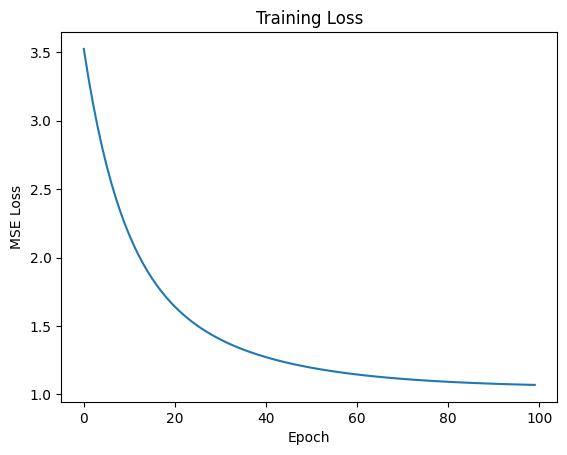

In [20]:
from torch import nn
model = nn.Linear(1,1)
opt = torch.optim.SGD(model.parameters(), lr =0.01)
loss_function = nn.MSELoss()
for epoch in range(100):
  y_predicted2 = model(x)
  loss = loss_function (y_predicted2, y)
  opt.zero_grad()
  loss.backward()
  opt.step()
print("Learned W and b", [p.data for p in model.parameters()])

plt.plot(losses)
plt.title("Training Loss")
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.show()

# Exercise 4: Implement Linear Regression from Scratch (PyTorch or NumPy)
- y = 3x + 2
- Compare learning rates [0.001, 0.01, 0.1]
- Use Adam optimizer
- Fit nonlinear function y = 2x^2 + 1

 W and b for lr=0.001: [tensor([[0.6806]]), tensor([0.9254])]


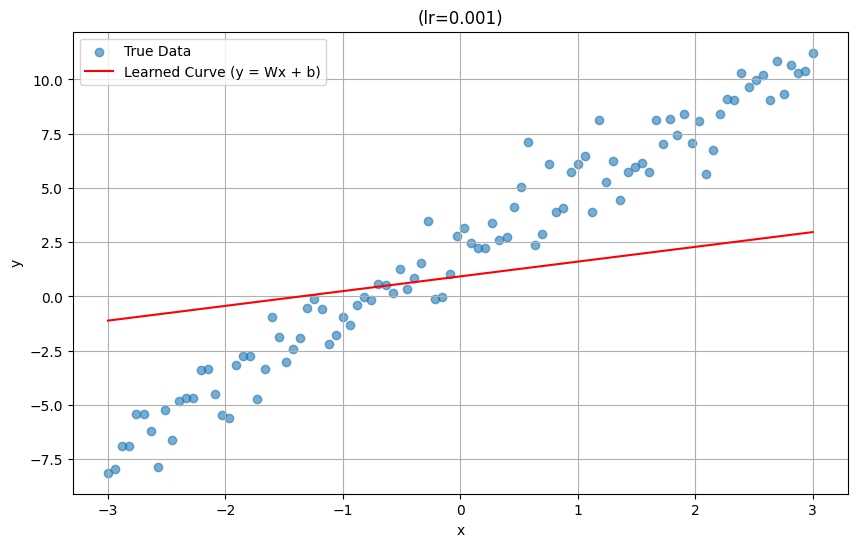

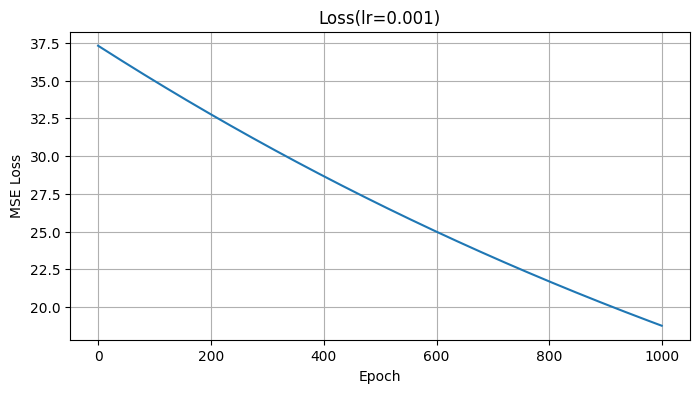

 W and b for lr=0.01: [tensor([[2.9991]]), tensor([2.0371])]


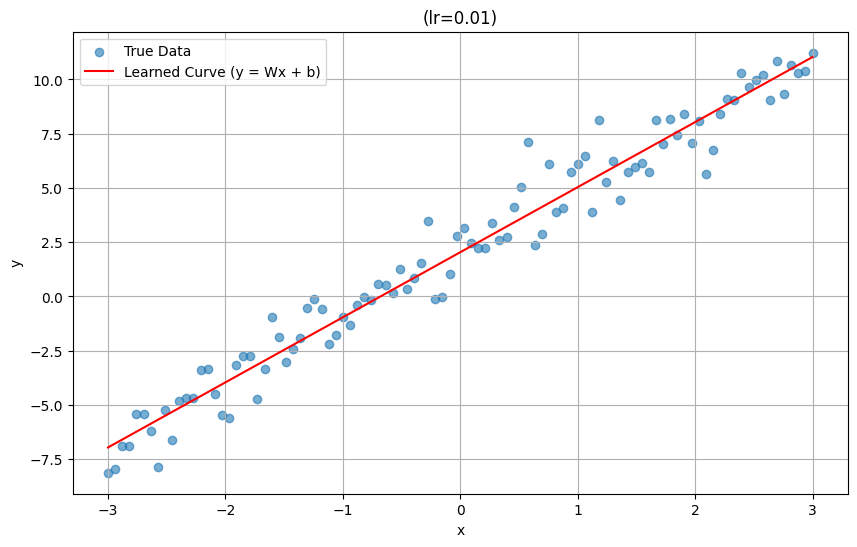

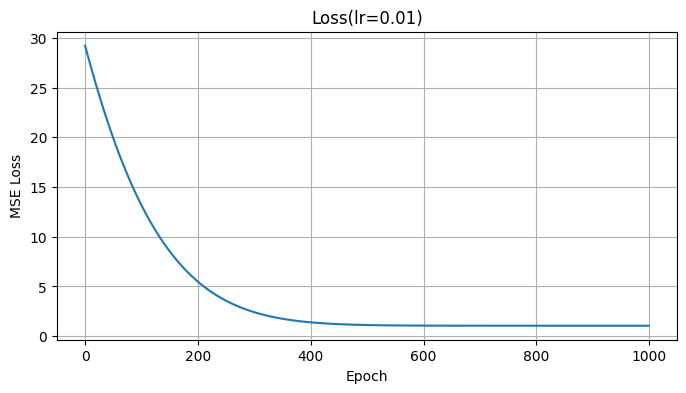

 W and b for lr=0.1: [tensor([[2.9996]]), tensor([2.0371])]


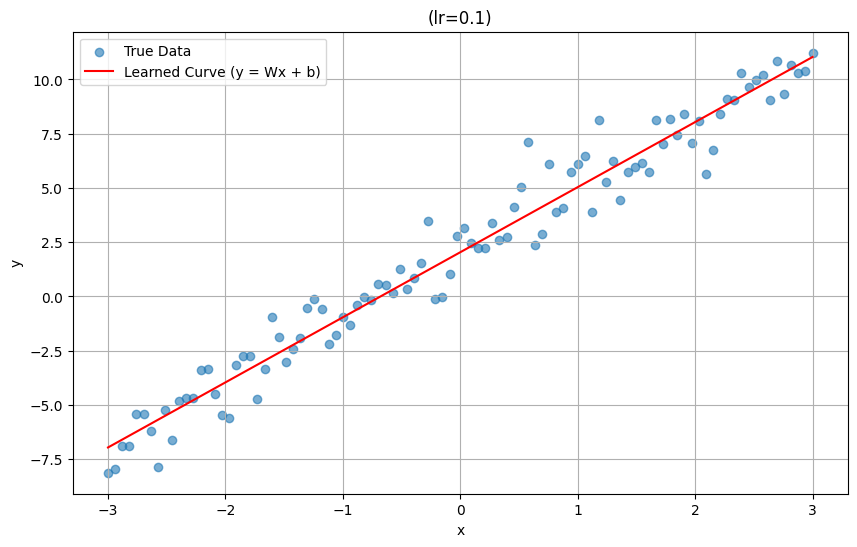

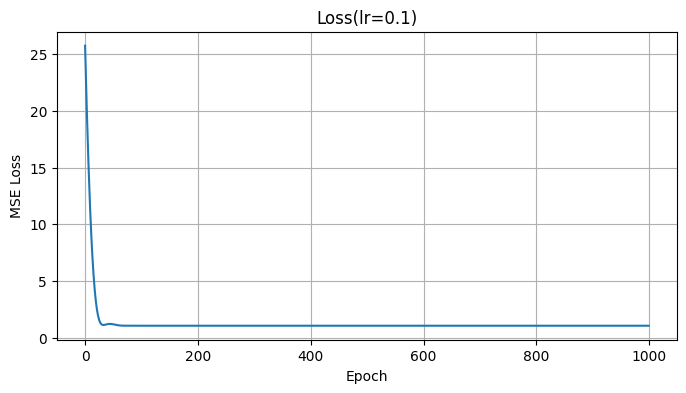

In [42]:
torch.manual_seed(0)
x = torch.linspace(-3, 3, 100).unsqueeze(1)
y = 3*x + 2 + torch.randn(x.size())

for lr_val in [0.001, 0.01, 0.1]:
    model = nn.Linear(1, 1)
    opt = torch.optim.Adam(model.parameters(), lr=lr_val)
    loss_function = nn.MSELoss()

    losses = []
    for epoch in range(1000):
        y_predicted = model(x)
        loss = loss_function(y_predicted, y)
        opt.zero_grad()
        loss.backward()
        opt.step()
        losses.append(loss.item())

    print(f" W and b for lr={lr_val}:", [p.data for p in model.parameters()])

    plt.figure(figsize=(10, 6))
    plt.scatter(x.numpy(), y.numpy(), label='True Data', alpha=0.6)
    plt.plot(x.numpy(), y_predicted.detach().numpy(), color='red', label='Learned Curve (y = Wx + b)')
    plt.title(f'(lr={lr_val})')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 4))
    plt.plot(losses)
    plt.title(f'Loss(lr={lr_val})')
    plt.xlabel('Epoch')
    plt.ylabel('MSE Loss')
    plt.grid(True)
    plt.show()

W: -0.0002
b: 6.3239


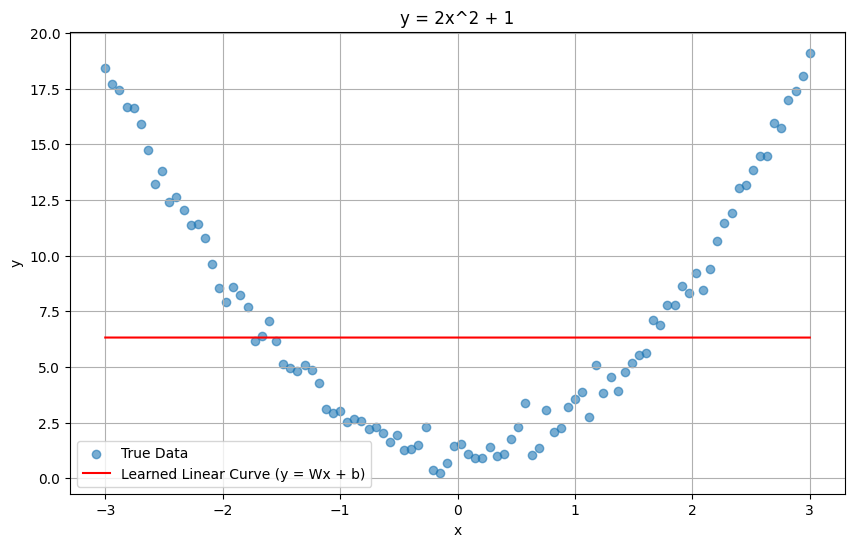

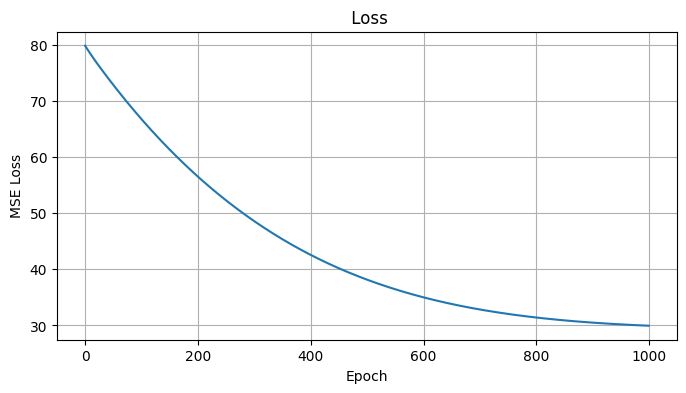

In [46]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.manual_seed(0)

x = torch.linspace(-3, 3, 100).unsqueeze(1)
y = 2 * x**2 + 1 + torch.randn(x.size()) * 0.5

model = nn.Linear(1, 1)

lr = 0.01
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
loss_function = nn.MSELoss()

epochs = 1000
losses = []

for epoch in range(epochs):
    y_predicted = model(x)
    loss = loss_function(y_predicted, y)
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f"W: {model.weight.item():.4f}")
print(f"b: {model.bias.item():.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(x.numpy(), y.numpy(), label='True Data', alpha=0.6)

with torch.no_grad():
    y_predicted_plot = model(x).numpy()

plt.plot(x.numpy(), y_predicted_plot, color='red', label='Learned Linear Curve (y = Wx + b)')
plt.title('y = 2x^2 + 1')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(losses)
plt.title(' Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.grid(True)
plt.show()

# Exercise 1: Try sigmoid

In [48]:
# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device: {device}")

Device: cpu


In [51]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

torch.manual_seed(42)

X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler= StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

class DeepNet(nn.Module):
  def __init__(self, input_dim, hidden_dims, output_dim, dropout_rate=0.4):
    super(DeepNet, self).__init__()
    self.layers= nn.Sequential(
        nn.Linear(input_dim, hidden_dims[0]),
        nn.Sigmoid(),
        nn.Dropout(dropout_rate),
        nn.Linear(hidden_dims[0], hidden_dims[1]),
        nn.Sigmoid(),
        nn.Dropout(dropout_rate),
        nn.Linear(hidden_dims[1], hidden_dims[2]),
        nn.Sigmoid(),
        nn.Dropout(dropout_rate),
        nn.Linear(hidden_dims[2], output_dim)
    )

  def forward(self, x):
    return self.layers(x)

model = DeepNet(input_dim=2, hidden_dims=[64, 32, 16], output_dim=2).to(device)
print(model)


DeepNet(
  (layers): Sequential(
    (0): Linear(in_features=2, out_features=64, bias=True)
    (1): Sigmoid()
    (2): Dropout(p=0.4, inplace=False)
    (3): Linear(in_features=64, out_features=32, bias=True)
    (4): Sigmoid()
    (5): Dropout(p=0.4, inplace=False)
    (6): Linear(in_features=32, out_features=16, bias=True)
    (7): Sigmoid()
    (8): Dropout(p=0.4, inplace=False)
    (9): Linear(in_features=16, out_features=2, bias=True)
  )
)


# Exercise 2: Try tanh

In [52]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

torch.manual_seed(42)

X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler= StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

class DeepNet(nn.Module):
  def __init__(self, input_dim, hidden_dims, output_dim, dropout_rate=0.4):
    super(DeepNet, self).__init__()
    self.layers= nn.Sequential(
        nn.Linear(input_dim, hidden_dims[0]),
        nn.Tanh(),
        nn.Dropout(dropout_rate),
        nn.Linear(hidden_dims[0], hidden_dims[1]),
        nn.Tanh(),
        nn.Dropout(dropout_rate),
        nn.Linear(hidden_dims[1], hidden_dims[2]),
        nn.Tanh(),
        nn.Dropout(dropout_rate),
        nn.Linear(hidden_dims[2], output_dim)
    )

  def forward(self, x):
    return self.layers(x)

model = DeepNet(input_dim=2, hidden_dims=[64, 32, 16], output_dim=2).to(device)
print(model)

DeepNet(
  (layers): Sequential(
    (0): Linear(in_features=2, out_features=64, bias=True)
    (1): Tanh()
    (2): Dropout(p=0.4, inplace=False)
    (3): Linear(in_features=64, out_features=32, bias=True)
    (4): Tanh()
    (5): Dropout(p=0.4, inplace=False)
    (6): Linear(in_features=32, out_features=16, bias=True)
    (7): Tanh()
    (8): Dropout(p=0.4, inplace=False)
    (9): Linear(in_features=16, out_features=2, bias=True)
  )
)


Device: cpu

Model Architecture:
RegressionNet(
  (layers): Sequential(
    (0): Linear(in_features=8, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=64, out_features=32, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=32, out_features=16, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.2, inplace=False)
    (9): Linear(in_features=16, out_features=1, bias=True)
  )
)

Training...
Epoch [50/500], Loss: 3.8087
Epoch [100/500], Loss: 1.1250
Epoch [150/500], Loss: 0.9404
Epoch [200/500], Loss: 0.7916
Epoch [250/500], Loss: 0.7300
Epoch [300/500], Loss: 0.6844
Epoch [350/500], Loss: 0.6588
Epoch [400/500], Loss: 0.6329
Epoch [450/500], Loss: 0.6131
Epoch [500/500], Loss: 0.6042

Training complete.
Test Loss: 0.3831


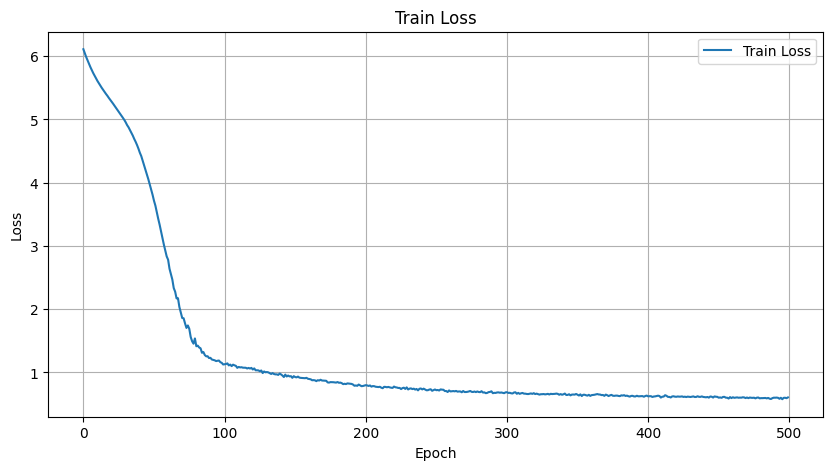

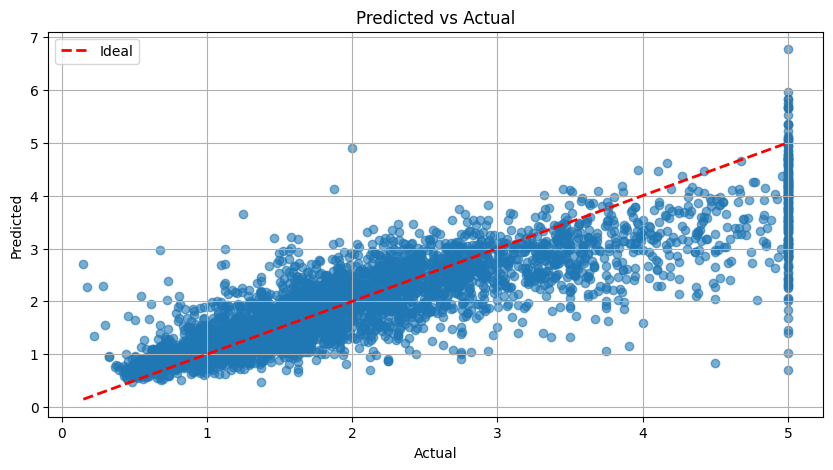

In [54]:
import torch
from torch import nn
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device: {device}")

housing = fetch_california_housing()
X, y = housing.data, housing.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1).to(device)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1).to(device)

class RegressionNet(nn.Module):
    def __init__(self, input_dim, hidden_dims, output_dim=1, activation_fn=nn.ReLU, dropout_rate=0.2):
        super(RegressionNet, self).__init__()
        layers = []
        layers.append(nn.Linear(input_dim, hidden_dims[0]))
        layers.append(activation_fn())
        layers.append(nn.Dropout(dropout_rate))

        for i in range(len(hidden_dims) - 1):
            layers.append(nn.Linear(hidden_dims[i], hidden_dims[i+1]))
            layers.append(activation_fn())
            layers.append(nn.Dropout(dropout_rate))

        layers.append(nn.Linear(hidden_dims[-1], output_dim))

        self.layers = nn.Sequential(*layers)

    def forward(self, x):
        return self.layers(x)

input_dim = X_train_tensor.shape[1]
hidden_dims = [64, 32, 16]
model = RegressionNet(input_dim=input_dim, hidden_dims=hidden_dims, activation_fn=nn.ReLU).to(device)
print("\nModel Architecture:")
print(model)

loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

epochs = 500
train_losses = []

print("\nTraining...")
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    y_pred = model(X_train_tensor)
    loss = loss_function(y_pred, y_train_tensor)

    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())

    if (epoch+1) % 50 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

print("\nTraining complete.")

model.eval()
with torch.no_grad():
    y_test_pred = model(X_test_tensor)
    test_loss = loss_function(y_test_pred, y_test_tensor)
    print(f'Test Loss: {test_loss.item():.4f}')

plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.title('Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(y_test_tensor.cpu().numpy(), y_test_pred.cpu().numpy(), alpha=0.6)
plt.plot([y_test_tensor.min(), y_test_tensor.max()], [y_test_tensor.min(), y_test_tensor.max()], 'r--', lw=2, label='Ideal')
plt.title('Predicted vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.grid(True)
plt.show()